### Signal processing application in 3 mins long G critical simluated LFPs

In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import hilbert, chirp
# import tools
# sys.path.append("/mnt/c/Users/wayne/tvb/tvbtools")
sys.path.append("/mnt/w/github/tvbtools")
from tools.signalTools import signalToolkit
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')
%matplotlib inline

/home/wayne/miniconda3/envs/tvbenv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


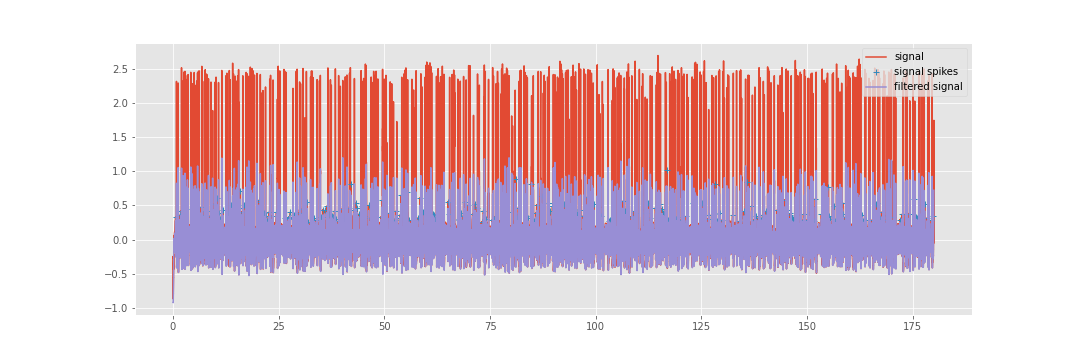

In [2]:
# import example data
# filename = "/mnt/c/Users/wayne/tvb/gc3mins/SNC/2820A.h5"
filename = "/mnt/w/go3mins/SNC/2820A.h5"
subjects = signalToolkit(filename, fs=81920.)
pcgleftAF, N, delay = subjects.signalpreprocessing(channelNum = 4, filter = True, low=2., high=10.)
rawpcgleft = subjects.signalpreprocessing(channelNum=4, filter=False)
rawparas = {'prominence': 0.5, 'threshold': 0}
filteredparas = {'prominence': 0.5, 'width':3000, 'threshold': 0}
spikeslist, valleyslist = subjects.peaksValleys(rawpcgleft, rawparas, rawparas)
spikeslistAF, valleyslistAF = subjects.peaksValleys(pcgleftAF, filteredparas, filteredparas)
%matplotlib widget
# subjects.psd(visual = True, digit = 122)
subjects.signal_AF(data=rawpcgleft, spikeslist = spikeslist, valleyslist = valleyslist, N=N, delay=delay, afterFiltered = pcgleftAF, spikeslistAF = spikeslistAF, valleyslistAF = valleyslistAF,digit=111)